# Comparison  Report

## Visualize the information of the desired data

## Introduction
- This tool is data analysis software using Pycharm.
- The data we have measures wafer information in the form of 'LMZ' if we have information about four wafers for one lot.
- The measured data can be compared for several parts as a result of the csv file.

## Library function required to excute code

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
warnings.filterwarnings('ignore')

### Bring the result of data csv file

In [11]:
df_train = pd.read_csv('../res/PE02_LMZ_excel_data.csv')

## 1. ErrorFlag

- This graphs show the error flag of the R-square value of IV_fitting, Transmission specta_fitting and V_piL by Transmission fitting.
- The first code is the code that traverses the wafer's data frame.
- The second is a graph of the data that is circulated.

In [12]:
wafer_error_counts = {}

desired_errors = ['IV_fit_error', 'TR_fit_error', 'V_piL_error by TR_fit']
for error in desired_errors:
    wafer_error_counts.setdefault(error, {})

for index, row in df_train.iterrows():
    wafer = row['Wafer']
    error_description = row['Error description']
    error_list = error_description.split(',')

    for error in error_list:
        for desired_error in desired_errors:
            wafer_error_counts[desired_error].setdefault(wafer, 0)
            if desired_error in error:
                wafer_error_counts[desired_error][wafer] += 1

Wafer
D07     7.0
D08    21.0
D23    32.0
D24    36.0
Name: ErrorFlag, dtype: float64
     IV_fit_error  TR_fit_error  V_piL_error by TR_fit
D07             0             7                      0
D08             0            21                      0
D23             0            27                      5
D24             0            28                      8


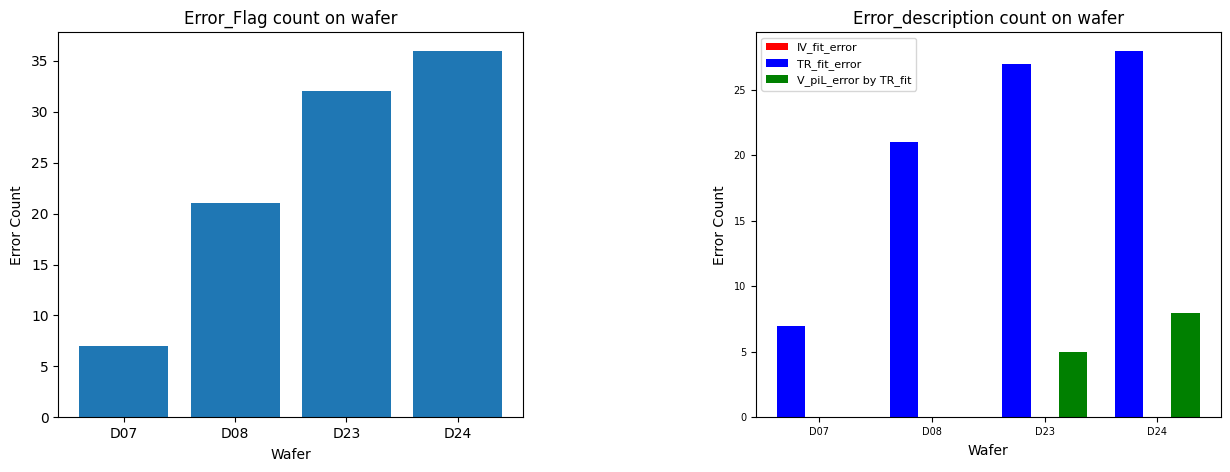

In [13]:
wafer_error_counts_2 = df_train.groupby('Wafer')['ErrorFlag'].sum()
print(wafer_error_counts_2)

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax1.bar(wafer_error_counts_2.index, wafer_error_counts_2.values)

ax1.set_xlabel('Wafer')
ax1.set_ylabel('Error Count')
ax1.xaxis.labelpad = 5
ax1.yaxis.labelpad = 5
ax1.set_title('Error_Flag count on wafer')

graph_data = pd.DataFrame(wafer_error_counts).fillna(0)
print(graph_data)

width = 0.25
x = np.arange(len(graph_data.index))
# print(graph_data.columns[0])
ax2.bar(x, graph_data['IV_fit_error'], width, color = 'red', label=graph_data.columns[0])
ax2.bar(x - width, graph_data['TR_fit_error'], width, color = 'blue', label=graph_data.columns[1])
ax2.bar(x + width, graph_data['V_piL_error by TR_fit'], width, color = 'green', label=graph_data.columns[2])

ax2.set_xticks(x)
ax2.set_xticklabels(graph_data.index,fontsize = 7)
ax2.set_xlabel('Wafer')
ax2.set_ylabel('Error Count')
ax2.tick_params(axis='both', labelsize=7)  # 축이 both인 경우, 양쪽 축 모두에 대해 눈금 레이블 크기를 설정합니다.
ax2.legend(fontsize = 8)
ax2.xaxis.labelpad = 5
ax2.yaxis.labelpad = 5
ax2.set_title('Error_description count on wafer')

plt.subplots_adjust(wspace=0.5)  # 서브플롯 간의 간격 조정


## 2. Number of data analyzed by LMZC & LMZO by wafer
- This graph shows the number of data analyzed by LMZC and LMZO for all sample wafer.
- You can know the number of data in the C-band(1550nm) and O-band(1310nm).

Text(0.5, 1.0, 'Count of 1310 and 1550 by Wafer')

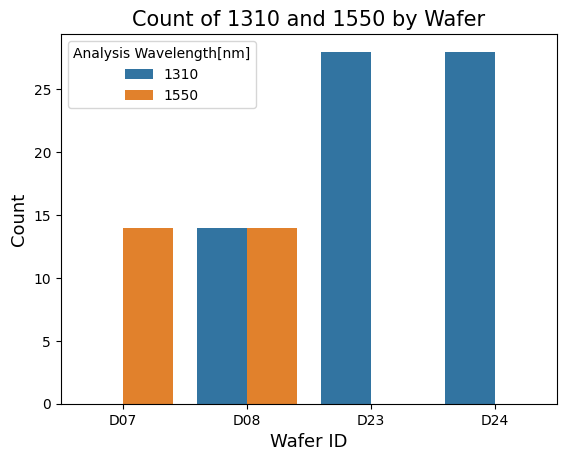

In [14]:
df_filtered = df_train[df_train['Analysis Wavelength[nm]'].isin([1310, 1550])]

counts = df_filtered.groupby(['Wafer', 'Analysis Wavelength[nm]']).size().unstack(fill_value=0)

counts = counts.reset_index()

melted_counts = pd.melt(counts, id_vars='Wafer', value_vars=[1310, 1550], var_name='Analysis Wavelength[nm]', value_name='Count')

fig, ax = plt.subplots()

sns.barplot(x='Wafer', y='Count', hue='Analysis Wavelength[nm]', data=melted_counts, ax=ax)

plt.xlabel('Wafer ID', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title('Count of 1310 and 1550 by Wafer', fontsize=15)

## 3. R-square of IV & box plot data
- This graph is a graph showing the R-square of the IV graph and is an indicator of how well fitting has been performed.
- Left graph used 'swarmplot' for each result, and right graph used 'boxplot' for whole result of each wafer.

Text(0, 0.5, 'Rsq of IV')

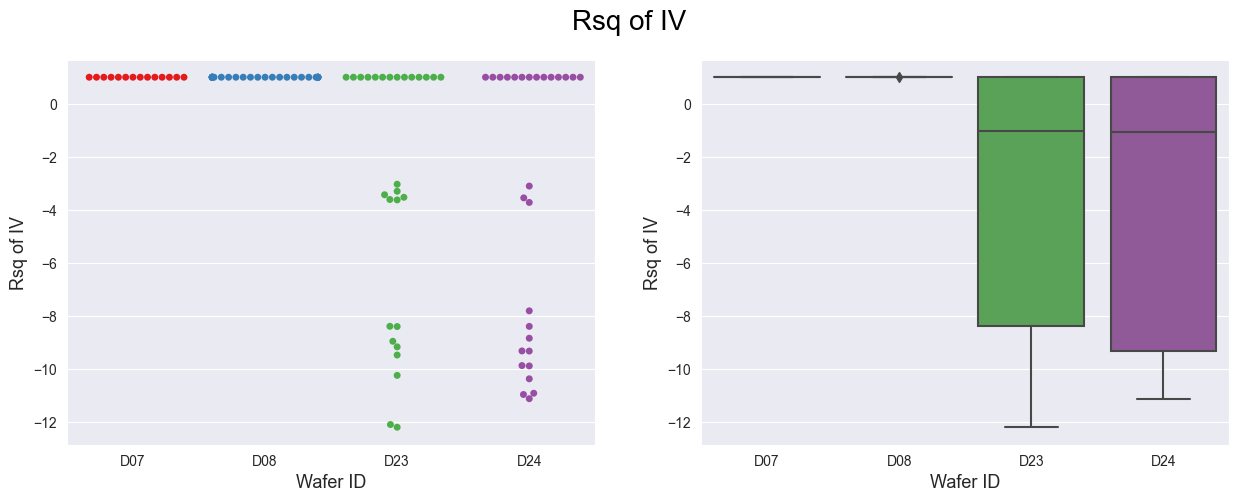

In [15]:
fig = plt.figure(figsize = (15, 5))
plt.suptitle('Rsq of IV', fontsize = 20)
sns.set_style("darkgrid")

pic_1 = plt.subplot(1, 2, 1)
sns.swarmplot(x = 'Wafer', y = 'Rsq of IV', data = df_train, ax = pic_1, palette='Set1')
plt.xlabel('Wafer ID', fontsize = 13)
plt.ylabel('Rsq of IV', fontsize = 13)

pic_2 = plt.subplot(1, 2, 2)
sns.boxplot(x = 'Wafer', y = 'Rsq of IV', data = df_train, ax = pic_2, palette='Set1')
plt.xlabel('Wafer ID', fontsize = 13)
plt.ylabel('Rsq of IV', fontsize = 13)

## 4. R-square of TR & box plot data
- This graph is a graph showing the R-square of the Transmission spectra graph and  is a measure of how constant the refractive index is.
- Left graph used 'swarmplot' for each result, and right graph used 'boxplot' for whole result of each wafer.

Text(0, 0.5, 'rsq of TR')

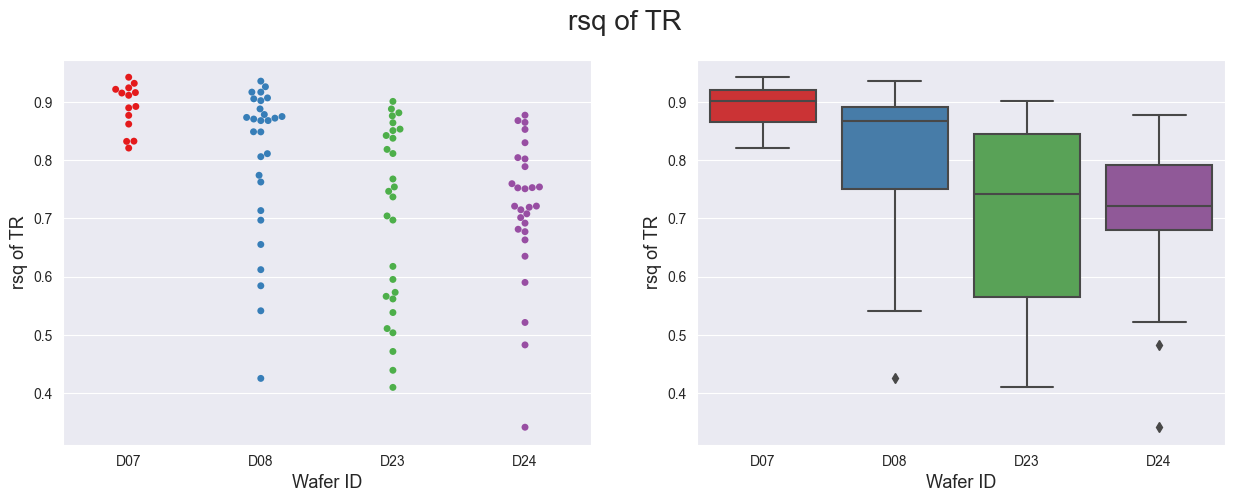

In [16]:
fig = plt.figure(figsize = (15, 5))
plt.suptitle('rsq of TR', fontsize = 20)
sns.set_style("darkgrid")

pic_1 = plt.subplot(1, 2, 1)
sns.swarmplot(x = 'Wafer', y = 'rsq of TR', data = df_train, ax = pic_1, palette='Set1')
plt.xlabel('Wafer ID', fontsize = 13)
plt.ylabel('rsq of TR', fontsize = 13)

pic_2 = plt.subplot(1, 2, 2)
sns.boxplot(x = 'Wafer', y = 'rsq of TR', data = df_train, ax = pic_2, palette='Set1')
plt.xlabel('Wafer ID', fontsize = 13)
plt.ylabel('rsq of TR', fontsize = 13)

## 5. n_eff of each wafer & box plot data
- This graph is a graph showing the refractive index of each wafer graph and is an indicator of how well fitting has been performed.
- Left graph used 'swarmplot' for each result, and right graph used 'boxplot' for whole result of each wafer.

Text(0, 0.5, 'n_eff')

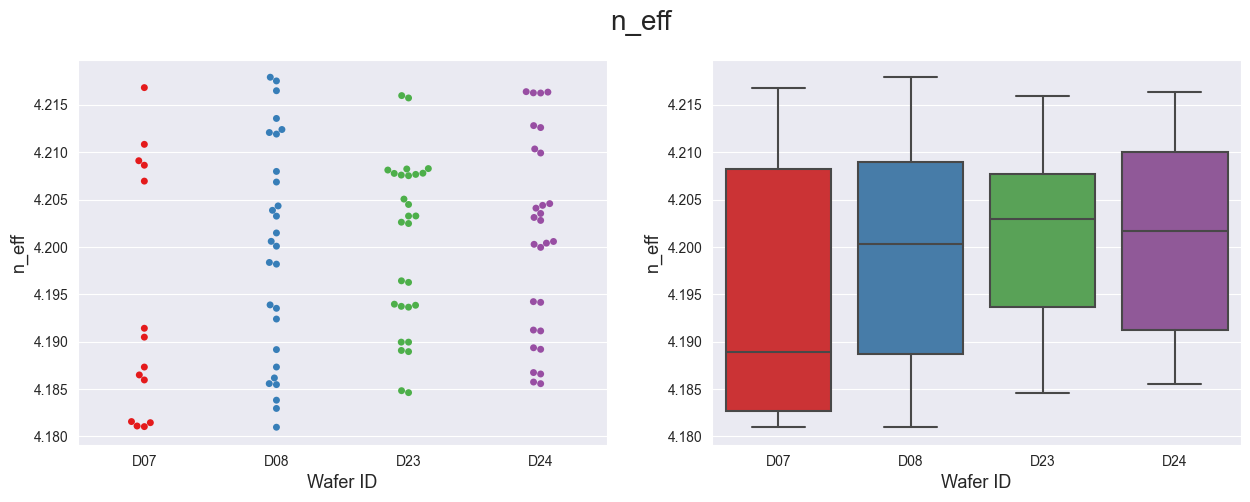

In [17]:
fig = plt.figure(figsize = (15, 5))
plt.suptitle('n_eff', fontsize=20)
sns.set_style("darkgrid")

pic_1 = plt.subplot(1, 2, 1)
sns.swarmplot(x = 'Wafer', y = 'n_eff', data = df_train, ax = pic_1, palette='Set1')
plt.xlabel('Wafer ID', fontsize=13)
plt.ylabel('n_eff', fontsize=13)

pic_2 = plt.subplot(1, 2, 2)
sns.boxplot(x = 'Wafer', y = 'n_eff', data = df_train, ax = pic_2, palette='Set1')
plt.xlabel('Wafer ID', fontsize=13)
plt.ylabel('n_eff', fontsize=13)

## 6. V_piL of each wafer & box plot data
- This graph is a graph showing the refractive index of each wafer graph and is an indicator of how well fitting has been performed.
- Left graph used 'swarmplot' for each result, and right graph used 'boxplot' for whole result of each wafer.

Text(0, 0.5, 'V_piL[V]')

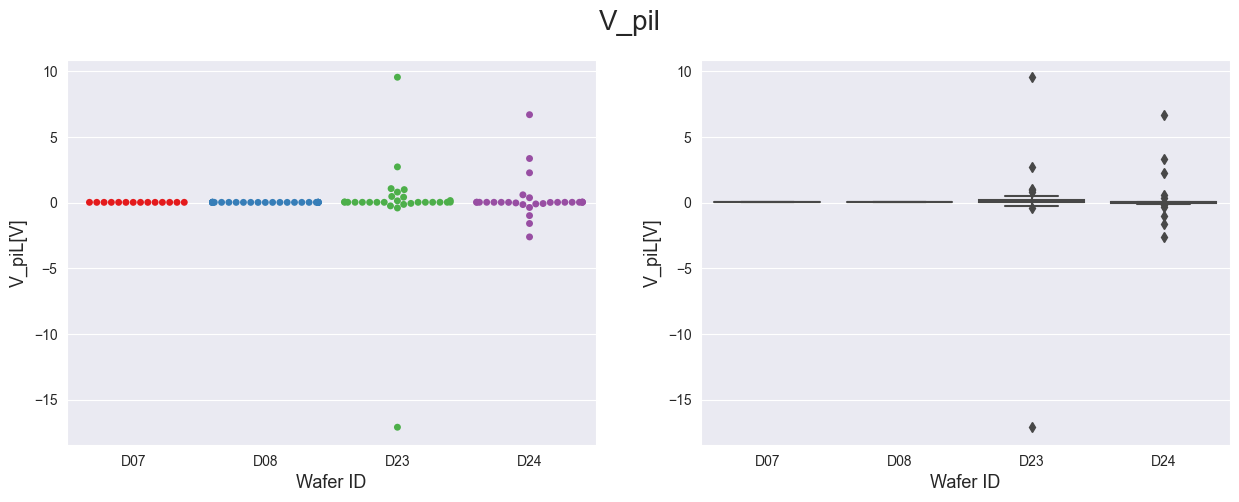

In [18]:
fig = plt.figure(figsize = (15, 5))
plt.suptitle('V_pil', fontsize=20)
sns.set_style("darkgrid")

pic_1 = plt.subplot(1, 2, 1)
sns.swarmplot(x = 'Wafer', y = 'V_piL[V]', data = df_train, ax = pic_1, palette='Set1')
plt.xlabel('Wafer ID', fontsize=13)
plt.ylabel('V_piL[V]', fontsize=13)

pic_2 = plt.subplot(1, 2, 2)
sns.boxplot(x = 'Wafer', y = 'V_piL[V]', data = df_train, ax = pic_2, palette='Set1')
plt.xlabel('Wafer ID', fontsize=13)
plt.ylabel('V_piL[V]', fontsize=13)

## 7. R-square of Ref.spectrum(N_th) & box plot data

- This graph shows the R-square of the reference values of the spectrum, and is the data required to compare with the measurement data.
- Left graph used 'swarmplot' for each result, and right graph used 'boxplot' for whole result of each wafer.

Text(0, 0.5, 'Rsq of ref. spec.')

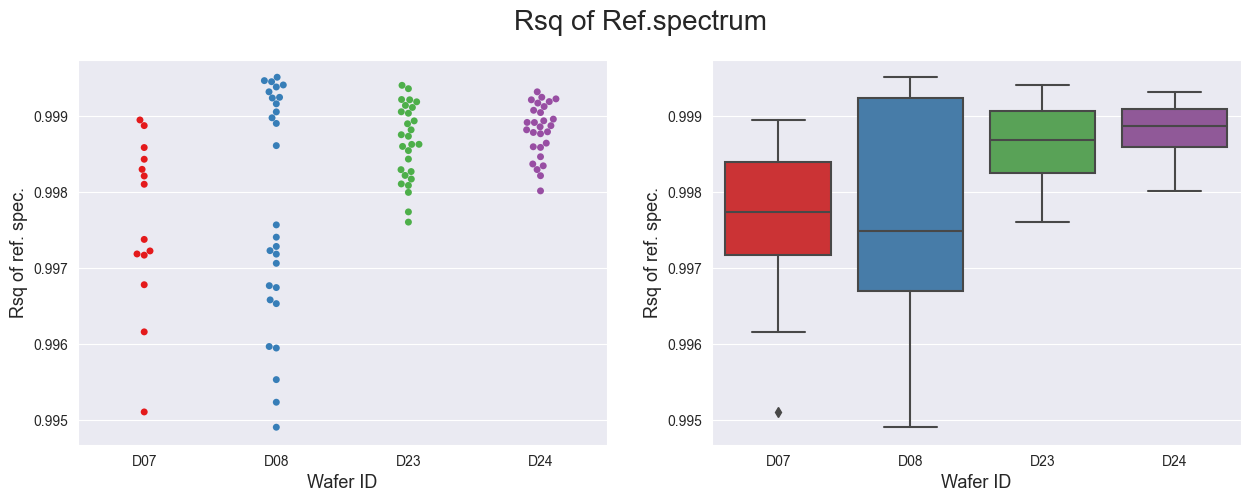

In [19]:
fig = plt.figure(figsize = (15, 5))
plt.suptitle('Rsq of Ref.spectrum', fontsize=20)
sns.set_style("darkgrid")

pic_1 = plt.subplot(1, 2, 1)
sns.swarmplot(x = 'Wafer', y = 'Rsq of Ref.spectrum(Nth)', data = df_train, ax = pic_1, palette='Set1')
plt.xlabel('Wafer ID', fontsize=13)
plt.ylabel('Rsq of ref. spec.', fontsize=13)

pic_2 = plt.subplot(1, 2, 2)
sns.boxplot(x = 'Wafer', y = 'Rsq of Ref.spectrum(Nth)', data = df_train, ax = pic_2, palette='Set1')
plt.xlabel('Wafer ID', fontsize=13)
plt.ylabel('Rsq of ref. spec.', fontsize=13)

## 8. Max_transmission of Ref.spectrum(dB) & box plot data

- This graph shows the maximum value of the transmission value of the spectrum reference, and necessary information can be obtained according to the wavelength band.
- Left graph used 'swarmplot' for each result, and right graph used 'boxplot' for whole result of each wafer.

Text(0, 0.5, 'Max_transmission of Ref.spec.(dB)')

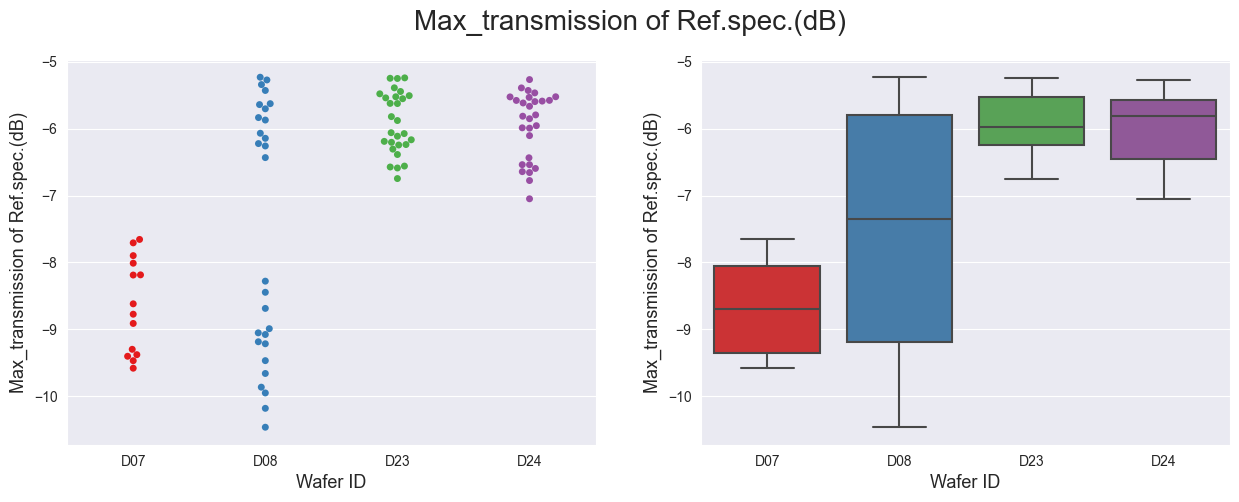

In [20]:
fig = plt.figure(figsize = (15, 5))
plt.suptitle('Max_transmission of Ref.spec.(dB)', fontsize = 20)
sns.set_style("darkgrid")

pic_1 = plt.subplot(1, 2, 1)
sns.swarmplot(x = 'Wafer', y = 'Max_transmission of Ref.spec.(dB)', data = df_train, ax = pic_1, palette='Set1')
plt.xlabel('Wafer ID', fontsize = 13)
plt.ylabel('Max_transmission of Ref.spec.(dB)', fontsize = 13)

pic_2 = plt.subplot(1, 2, 2)
sns.boxplot(x = 'Wafer', y = 'Max_transmission of Ref.spec.(dB)', data = df_train, ax = pic_2, palette='Set1')
plt.xlabel('Wafer ID', fontsize = 13)
plt.ylabel('Max_transmission of Ref.spec.(dB)', fontsize = 13)

## 9. Current value when -1V is applied

- These are two graph about current value when -1V is applied, you can see each value of four wafers.
- Left graph used 'swarmplot' for all value point, and right graph used 'boxplot' for whole result of each wafer.

Text(0, 0.5, 'I at -1V[A]')

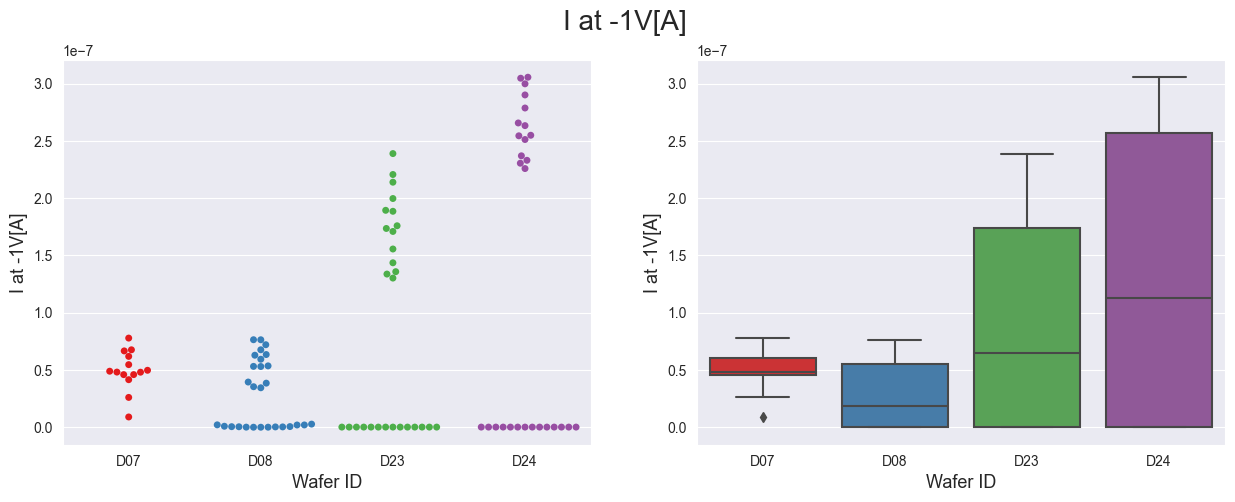

In [21]:
fig = plt.figure(figsize = (15, 5))
plt.suptitle('I at -1V[A]', fontsize = 20)
sns.set_style("darkgrid")

pic_1 = plt.subplot(1, 2, 1)
sns.swarmplot(x = 'Wafer', y = 'I at -1V[A]', data = df_train, ax = pic_1, palette='Set1')
plt.xlabel('Wafer ID', fontsize = 13)
plt.ylabel('I at -1V[A]', fontsize = 13)

pic_2 = plt.subplot(1, 2, 2)
sns.boxplot(x = 'Wafer', y = 'I at -1V[A]', data = df_train, ax = pic_2, palette='Set1')
plt.xlabel('Wafer ID', fontsize = 13)
plt.ylabel('I at -1V[A]', fontsize = 13)

## 10. Current value when 1V is applied

- These are two graph about current value when 1V is applied, you can see each value of four wafers.
- Left graph used 'swarmplot' for all value point, and right graph used 'boxplot' for whole result of each wafer.

Text(0, 0.5, 'I at 1V[A]')

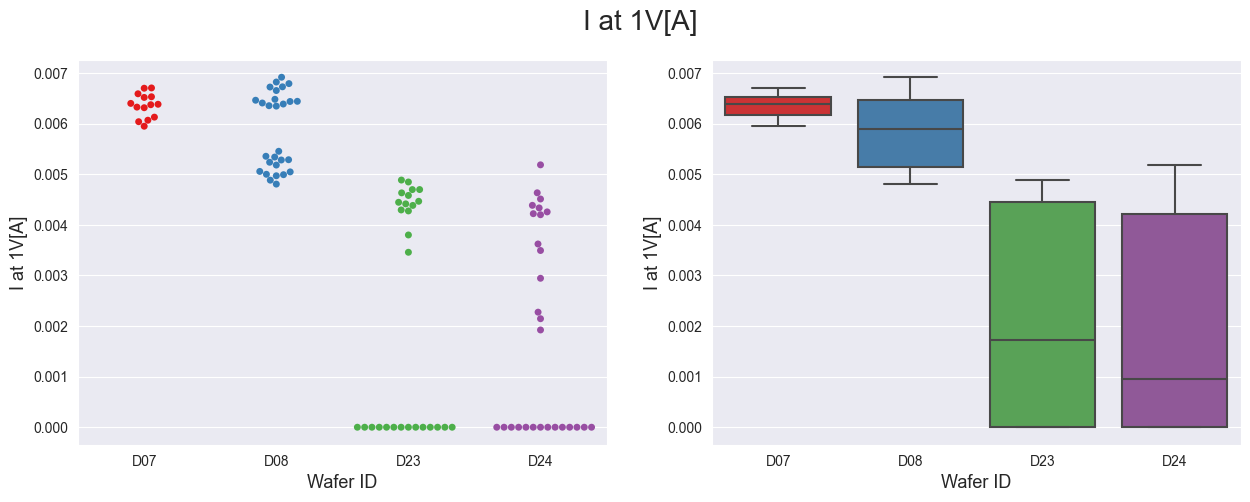

In [22]:
fig = plt.figure(figsize = (15, 5))
plt.suptitle('I at 1V[A]', fontsize = 20)
sns.set_style("darkgrid")

pic_1 = plt.subplot(1, 2, 1)
sns.swarmplot(x = 'Wafer', y = 'I at 1V[A]', data = df_train, ax = pic_1, palette='Set1')
plt.xlabel('Wafer ID', fontsize = 13)
plt.ylabel('I at 1V[A]', fontsize = 13)

pic_2 = plt.subplot(1, 2, 2)
sns.boxplot(x = 'Wafer', y = 'I at 1V[A]', data = df_train, ax = pic_2, palette='Set1')
plt.xlabel('Wafer ID', fontsize = 13)
plt.ylabel('I at 1V[A]', fontsize = 13)

# Thank you for reading our team report!